## Инициализация проекта

In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings

In [434]:
data = pd.read_csv('../data/credit_card_fraud.csv')

## Исследование исходных данных 
### Вывод базовой информации

In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


<font size=3>
Датасет содержит следующие поля:

- `distance_from_home` — расстояние от дома до места совершения транзакции
- `distance_from_last_transaction` — расстояние от места последней транзакции до текущей
- `ratio_to_median_purchase_price` — отношение стоимости текущей покупки к медианной стоимости покупок
- `repeat_retailer` — совершена ли транзакция у того же продавца (ритейлера), что и предыдущие покупки
- `used_chip` — была ли транзакция выполнена с использованием кредитной карты
- `used_pin_number` — была ли транзакция совершена с использованием PIN-кода
- `online_order` — является ли транзакция онлайн-заказом
- `fraud` — является ли транзакция мошеннической
</font>

In [436]:
data.head(20)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [437]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


### Обработка пропущенных значений

In [438]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

distance_from_home                0.0
distance_from_last_transaction    0.0
ratio_to_median_purchase_price    0.0
repeat_retailer                   0.0
used_chip                         0.0
used_pin_number                   0.0
online_order                      0.0
fraud                             0.0
dtype: float64

Пропущенные значения отсутсвуют.

### Коррекция типов данных

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [440]:
data['repeat_retailer'] = data['repeat_retailer'].astype('uint8')
data['used_chip'] = data['used_chip'].astype('uint8')
data['used_pin_number'] = data['used_pin_number'].astype('uint8')
data['online_order'] = data['online_order'].astype('uint8')
data['fraud'] = data['fraud'].astype('uint8')

data.info()

# uint8 - целое неотрицательное число, занимающее 1 байт памяти (0 -> 255)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  uint8  
 4   used_chip                       1000000 non-null  uint8  
 5   used_pin_number                 1000000 non-null  uint8  
 6   online_order                    1000000 non-null  uint8  
 7   fraud                           1000000 non-null  uint8  
dtypes: float64(3), uint8(5)
memory usage: 27.7 MB


**Изменения**
- значения столбцов `repeat_retailer`, `used_chip`, `used_pin_number`, `online_order`, `fraud` должны иметь тип данных uint8 вместо float, поскольку логически эти столбцы не нуждаются в десятичном формате, а изменение типа экономит место в памяти

In [441]:
data['high_price_anomaly'] = (data['ratio_to_median_purchase_price'] > 5).astype('uint8')

data.head(20)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,high_price_anomaly
0,57.877857,0.311140,1.945940,1,1,0,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0,0
3,2.247564,5.600044,0.362663,1,1,0,1,0,0
4,44.190936,0.566486,2.222767,1,1,0,1,0,0
5,5.586408,13.261073,0.064768,1,0,0,0,0,0
6,3.724019,0.956838,0.278465,1,0,0,1,0,0
7,4.848247,0.320735,1.273050,1,0,1,0,0,0
8,0.876632,2.503609,1.516999,0,0,0,0,0,0
9,8.839047,2.970512,2.361683,1,0,0,1,0,0


### Проверка "очищенных" данных

In [442]:
print(data.duplicated().sum())

0


Дубликаты в данных не обнаружены.

In [443]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  uint8  
 4   used_chip                       1000000 non-null  uint8  
 5   used_pin_number                 1000000 non-null  uint8  
 6   online_order                    1000000 non-null  uint8  
 7   fraud                           1000000 non-null  uint8  
 8   high_price_anomaly              1000000 non-null  uint8  
dtypes: float64(3), uint8(6)
memory usage: 28.6 MB


In [444]:
data.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,high_price_anomaly
0,57.877857,0.311140,1.945940,1,1,0,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0,0
3,2.247564,5.600044,0.362663,1,1,0,1,0,0
4,44.190936,0.566486,2.222767,1,1,0,1,0,0


Типы и значения данных обработаны, можно переходить к следующим этапам обаботки.

## EDA

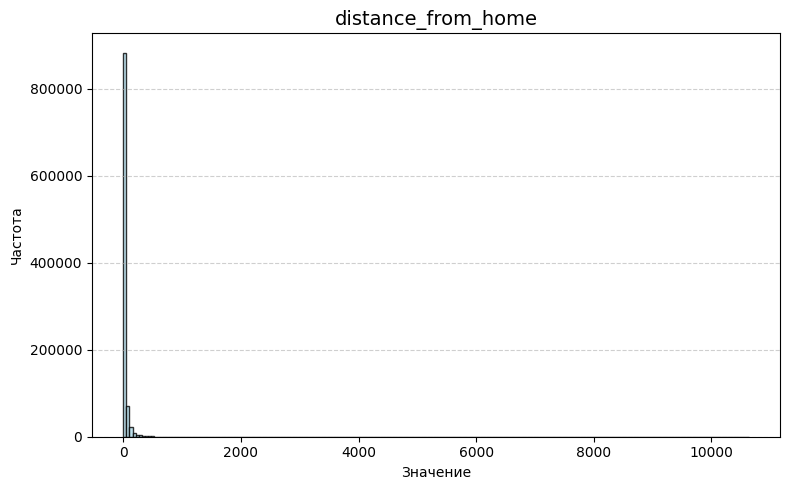

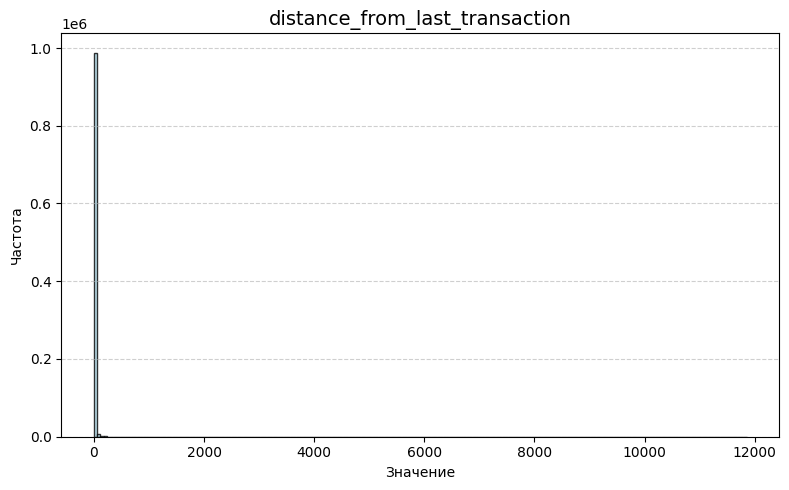

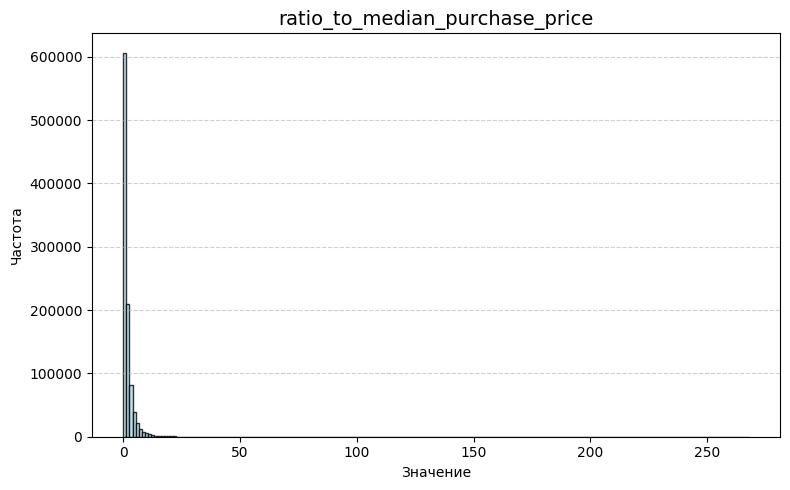

In [445]:
columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

for col in columns:
    plt.figure(figsize=(8, 5))
    
    
    plt.hist(
        data[col],
        bins=200,               
        color='lightblue',
        edgecolor='black',
        alpha=0.8
    )
    
    plt.title(f'{col}', fontsize=14)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

Выбросы затрудняют чтение данных о расстоянии от дома, расстоянии до последней транзакции и отношении стоимости текущей покупки к медианному значению чека

### Обработка выбросов

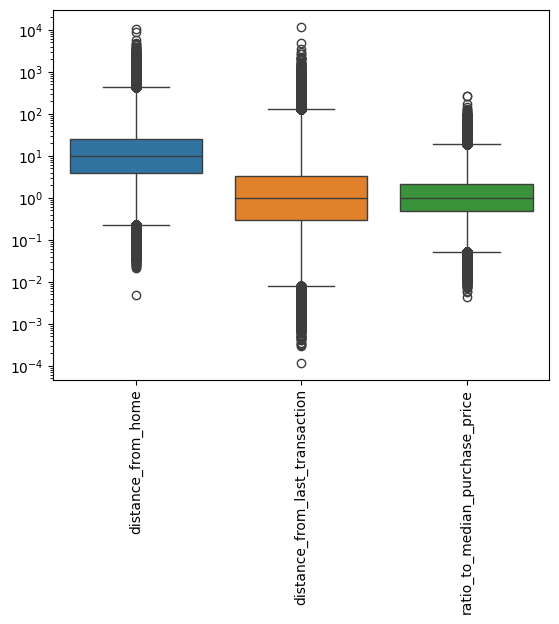

In [446]:
sns.boxplot(data[columns], log_scale=True)
plt.xticks(rotation=90)
plt.show()

In [447]:
data_filtered = data.copy()

data_filtered = data_filtered[(data_filtered['distance_from_home'] <= 100)]
data_filtered = data_filtered[data_filtered['distance_from_last_transaction'] <= 10]
data_filtered = data_filtered[data_filtered['ratio_to_median_purchase_price'] <= 5]

print(f"Было: {len(data)} строк")
print(f"Стало: {len(data_filtered)} строк")
print(f"Удалено: {len(data) - len(data_filtered)} строк")

data_filtered.head(10)

Было: 1000000 строк
Стало: 794153 строк
Удалено: 205847 строк


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,high_price_anomaly
0,57.877857,0.311140,1.945940,1,1,0,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0,0
3,2.247564,5.600044,0.362663,1,1,0,1,0,0
4,44.190936,0.566486,2.222767,1,1,0,1,0,0
6,3.724019,0.956838,0.278465,1,0,0,1,0,0
7,4.848247,0.320735,1.273050,1,0,1,0,0,0
8,0.876632,2.503609,1.516999,0,0,0,0,0,0
9,8.839047,2.970512,2.361683,1,0,0,1,0,0
10,14.263530,0.158758,1.136102,1,1,0,1,0,0


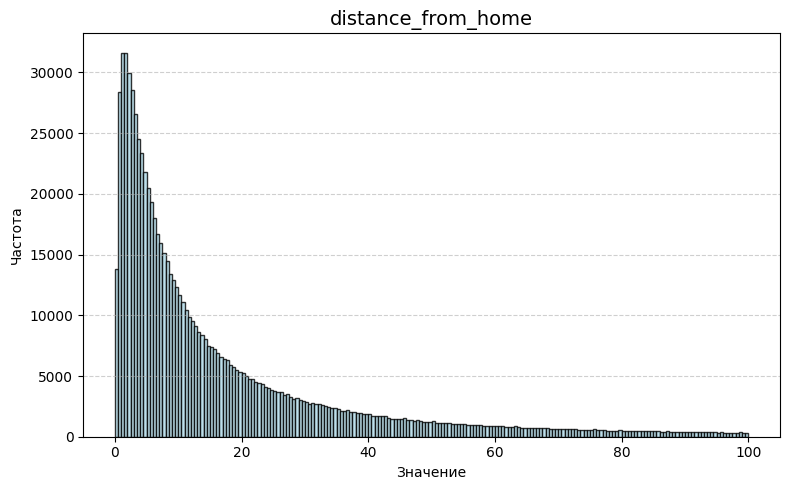

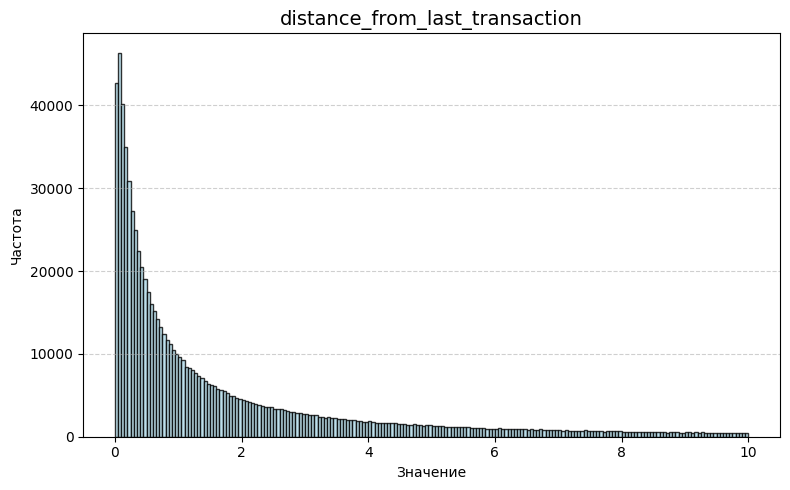

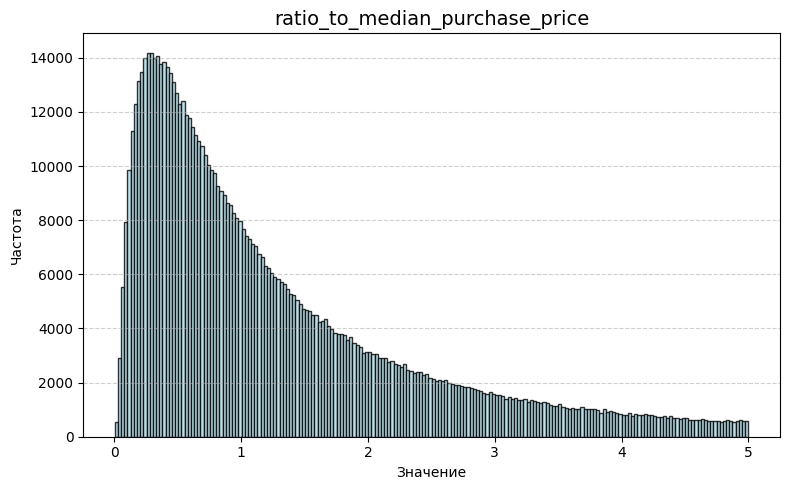

In [448]:
for col in columns:
    plt.figure(figsize=(8, 5))
    
    
    plt.hist(
        data_filtered[col],
        bins=200,               
        color='lightblue',
        edgecolor='black',
        alpha=0.8
    )
    
    plt.title(f'{col}', fontsize=14)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

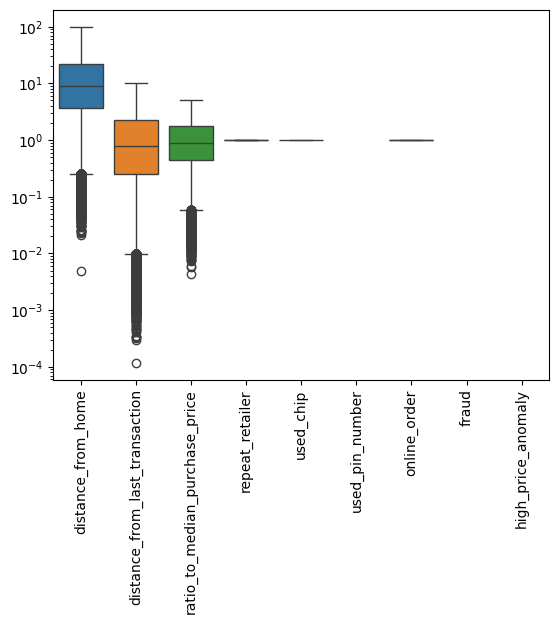

In [449]:
sns.boxplot(data_filtered, log_scale=True)
plt.xticks(rotation=90)

plt.show()

После очистки число выбросов заметно снизилось.

### Изучение основных параметров без выбросов

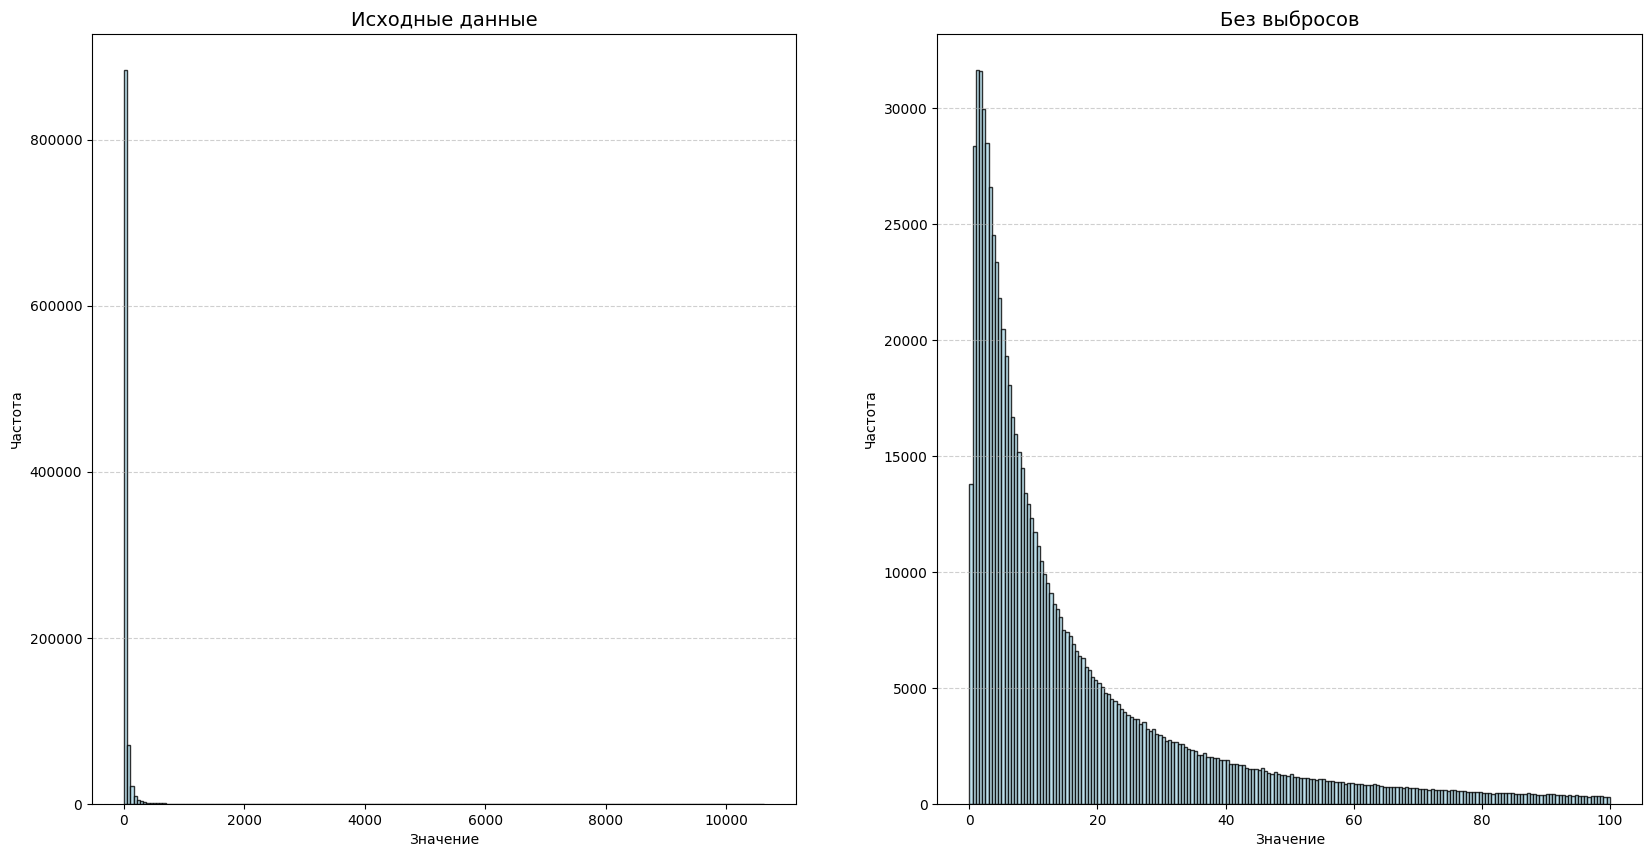

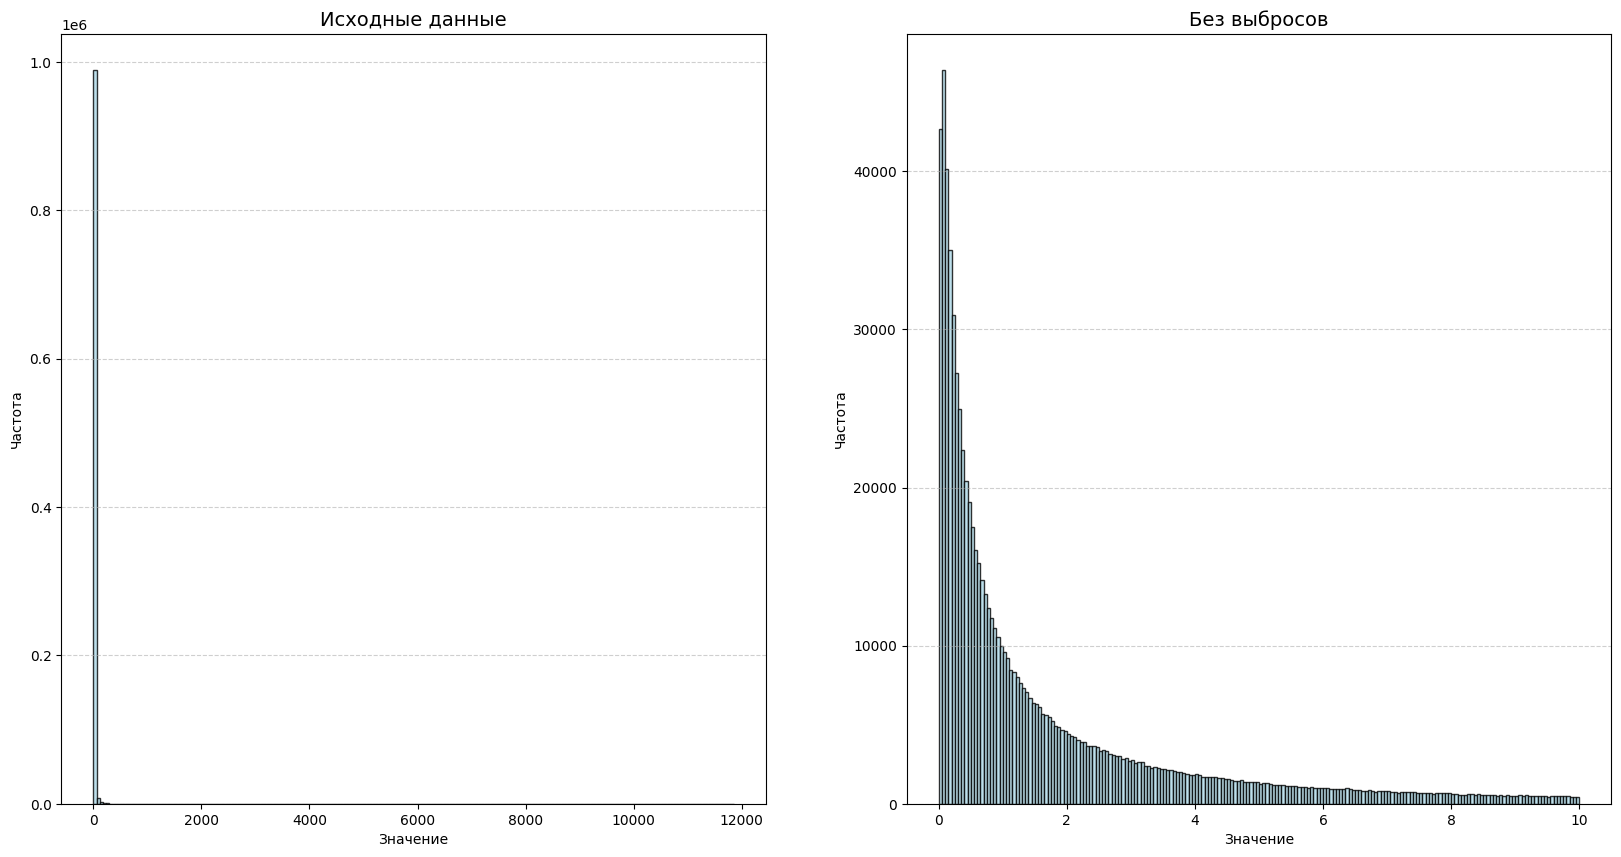

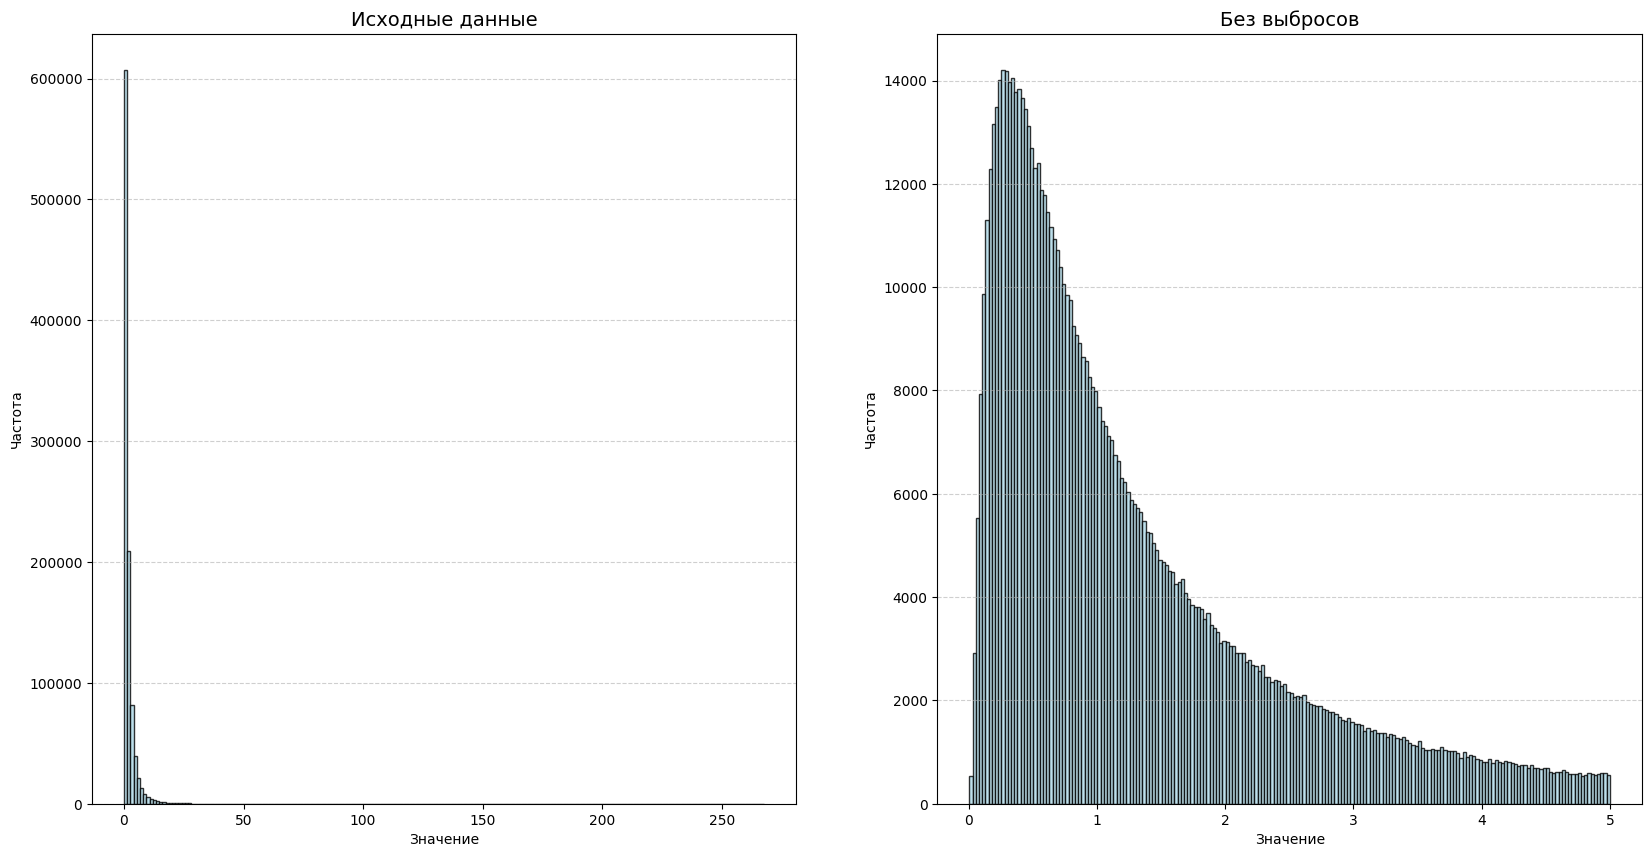

In [450]:
for col in columns:

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    axes[0].hist(
        data[col],
        bins=200,
        color='lightblue',
        edgecolor='black',
        alpha=0.8
    )
    axes[0].set_title('Исходные данные', fontsize=14)
    axes[0].set_xlabel('Значение')
    axes[0].set_ylabel('Частота')
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)

    axes[1].hist(
        data_filtered[col],
        bins=200,
        color='lightblue',
        edgecolor='black',
        alpha=0.8
    )
    axes[1].set_title('Без выбросов', fontsize=14)
    axes[1].set_xlabel('Значение')
    axes[1].set_ylabel('Частота')
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

**Сравнение**

Сравнение гистограмм исходных данных и отфильтрованного датасета показывает, что:
- в исходных данных присутствуют сильные выбросы, которые доминируют по частоте в левой части графика и искажают масштаб;
- после фильтрации распределение становится более детализированным и интерпретируемым: видна структура основной массы данных — пик у низких значений (0–20), плавное убывание и отсутствие аномальных «хвостов».

### Выявление закономерностей

#### Числовые величины и fraud

In [451]:
bis_dis_fr_h = stats.pointbiserialr(data['fraud'], data['distance_from_home'])

print("Корреляция =", round(bis_dis_fr_h[0], 4))
print("p_value = ", bis_dis_fr_h[1])

Корреляция = 0.1876
p_value =  0.0


Коэффициент корреляции между расстоянием от дома и признанием операции мошеннической составляет 0.1876 (слабая положительная связь). Это означает, что в среднем, мошеннические транзакции происходят дальше от дома, чем легитимные, однако связь не сильная, что говорит о существующих исключениях.

p_value показывает, какова вероятность получить такие (или более экстремальные) данные, если бы связи не самом деле не было. p-значение составляет 0 единиц, значит, вероятность того, что корреляция равная 0.1876 возникла случайно нулевая. Таким образом можно сделать вывод, что взаимосвязь между признаками действительно существует.

In [452]:
bis_dis_fr_l_tr = stats.pointbiserialr(data['fraud'], data['distance_from_last_transaction'])

print("Корреляция =", round(bis_dis_fr_l_tr[0], 4))
print("p_value = ", bis_dis_fr_l_tr[1])

Корреляция = 0.0919
p_value =  0.0


Коэффициент корреляции между расстоянием от места последней транзакции до текущей и признанием операции мошеннической оказался равен 0.0919, что свидетельствует об очень слабой связи. В данном случае признак `distance_from_home` является более информативным, за счет более сильной связи.

p-value составил также 0 единиц.

In [453]:
bis_r = stats.pointbiserialr(data['fraud'], data['ratio_to_median_purchase_price'])

print("Корреляция =", round(bis_r[0], 4))
print("p_value = ", bis_r[1])

Корреляция = 0.4623
p_value =  0.0


Коэффициент корреляции между отношением стоимости текущей покупки к медианной стоимости покупок и признанием операции мошеннической составил 0.4623 (умеренно сильная положительная связь). Следовательно, мошеннические транзакции в среднем значительно дороже средних покупок пользователя. Высокая корреляция говорит о том, что признак `ratio_to_median_purchase_price` является одним из ключевых для обнаружения fraud.

p-значение равное 0 свидетельствует о том, что связь между признаками является неслучайной.

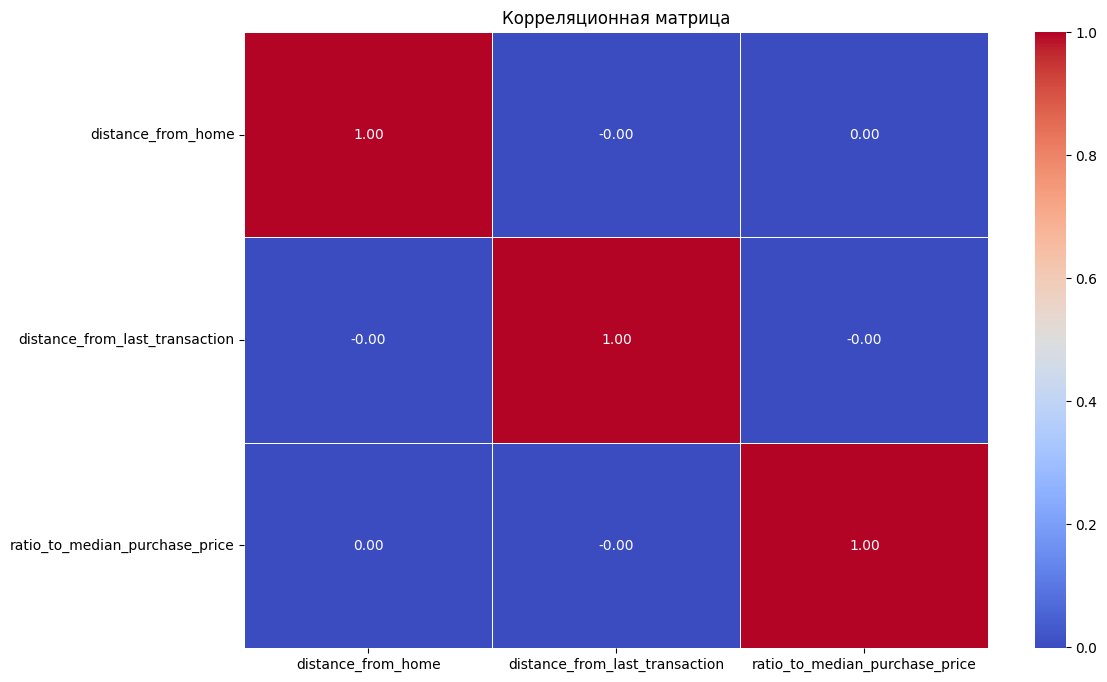

In [471]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_filtered[columns].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

Числовые признаки не имеют корреляции между собой, а значит являются независимыми и дополняют, но не дублируют друг друга.

#### Дихотомические величины и fraud

In [462]:
def phi_coefficient(col1, col2, data):
    contingency_table = pd.crosstab(data[col1], data[col2])
    
    if contingency_table.shape == (2, 2):
        chi2, _, _, _ = stats.chi2_contingency(contingency_table)
        n = contingency_table.values.sum()
        return np.sqrt(chi2 / n)
    else:
        return None

In [470]:
columns_dicrete = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

for col_d in columns_dicrete:
    phi_value = phi_coefficient('fraud', col_d, data)
    print(f"{col_d}: phi value = {round(phi_value, 4)}")



repeat_retailer: phi value = 0.0014
used_chip: phi value = 0.061
used_pin_number: phi value = 0.1003
online_order: phi value = 0.192


| Признак               | phi_value | Использовать? | Комментарий |
|-----------------------|--------------|---------------|-------------|
| `online_order`        | 0.192        | Да         | Один из ключевых бинарных признаков |
| `used_pin_number`     | 0.1003       | Да         | Слабая связь. Может быть полезен в комбинации с другими признаками |
| `used_chip`           | 0.061        | Нет | Очень слабая связь |
| `repeat_retailer`     | 0.0014       | Нет        | Практически отсутствует связь с мошенничеством. |

Исходя из низких значений phi_value, можно сделать вывод, что признаки `repeat_retailer` и `used_chip` являются несущественными.

### Заключение

Проанализировав данные, можно сделать вывод, что признак `ratio_to_median_purchase_price` (отношение стоимости текущей покупки к медианной стоимости покупок) с корреляцией 0.46 в наибольшей степени влияет на то, окажется ли транзация мошеннической. Признаки `distance_from_home` (расстояние от дома) с корреляцией 0.19 и `online_order` (является ли операция онлайн-заказом) с корреляцией 0.19 также имеют сказывается на `fraud`, но в меньшей степени.

### Сохранение данных для последующей обработки

In [473]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794153 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              794153 non-null  float64
 1   distance_from_last_transaction  794153 non-null  float64
 2   ratio_to_median_purchase_price  794153 non-null  float64
 3   repeat_retailer                 794153 non-null  uint8  
 4   used_chip                       794153 non-null  uint8  
 5   used_pin_number                 794153 non-null  uint8  
 6   online_order                    794153 non-null  uint8  
 7   fraud                           794153 non-null  uint8  
 8   high_price_anomaly              794153 non-null  uint8  
dtypes: float64(3), uint8(6)
memory usage: 28.8 MB


In [474]:
data_filtered.to_csv('../data/credit_card_fraud_filtered.csv', index=False)